Jason wants to marry Kriti. But Kriti’s father saysJason first needs to be competentenough to marry his daughter. So he tells Jason thathe needs to buy a house, a car anda computer (Kriti is a binge-queen) to be worthy ofher. Love knows no bounds andneither does Jason. So he decides to take up thischallenge and works day and night forthe next 1 year. After toiling away for such a longtime, he now needs to calculate thetotal amount of money he requires to fulfill Kriti’s(but really her father’s) wishes to findout if he has enough saved up right now or not. Datahas been given below and youneed to use that to help him figure out how much hewould need to spend to afford all ofthe above mentioned things. Your goal is to give Jasona total estimate of his expenses.

In [ ]:
pip install category_encoders

Necessary Modules :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import seaborn as sns
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading data :

In [ ]:
data=pd.read_csv('laptops.csv',encoding='ISO-8859–1',index_col=0)

In [ ]:
data

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


Check for any missing values that are present in the dataset :

In [ ]:
data.isnull().sum() 

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Plotting :

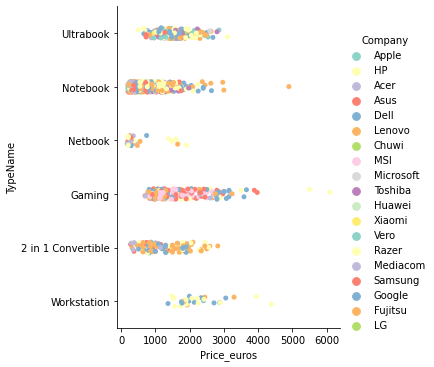

In [ ]:
sns.catplot(x = "Price_euros",y = 'TypeName',data = data, hue = "Company",palette="Set3")


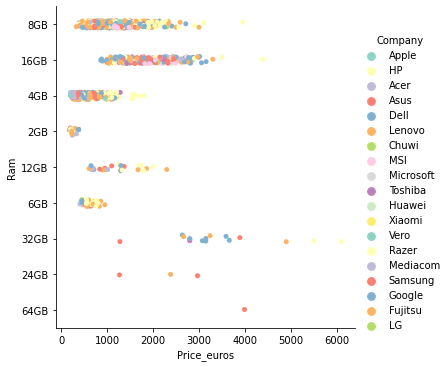

In [ ]:
sns.catplot(x = "Price_euros",y = 'Ram',data = data, hue = "Company",palette="Set3")


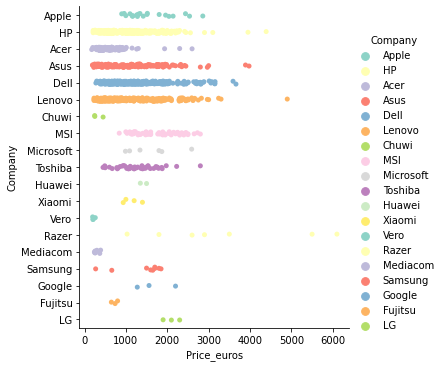

In [ ]:
sns.catplot(x = "Price_euros",y = 'Company',data = data, hue = "Company",palette="Set3")

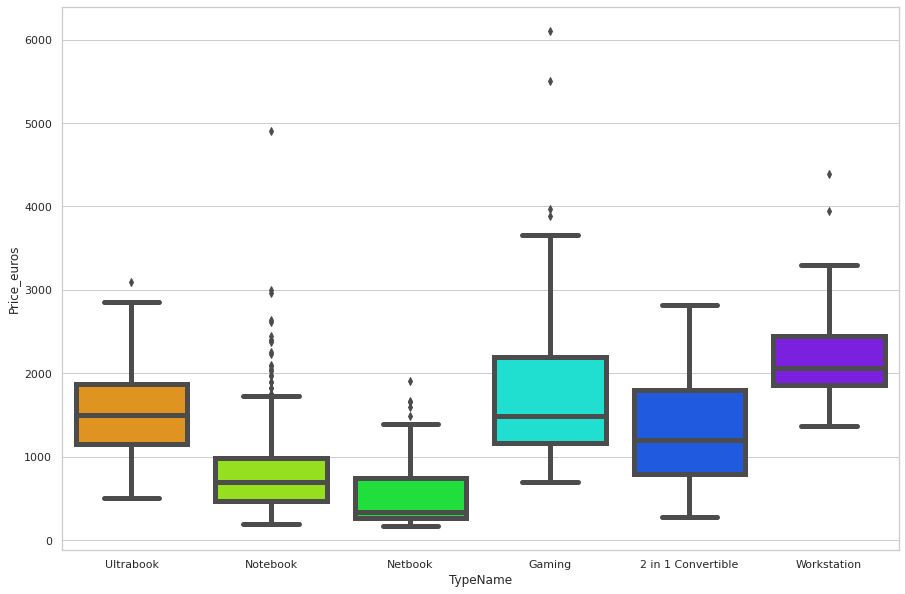

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x='TypeName',y='Price_euros',data = data,palette='gist_rainbow',linewidth=5)

Dealing with outliers :


In [ ]:
Q1 = data['Price_euros'].quantile(0.25)
Q3 = data['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Price_euros'] >= Q1 - 1.5 * IQR) & (data['Price_euros'] <= Q3 + 1.5 *IQR)
data = data.loc[filter]

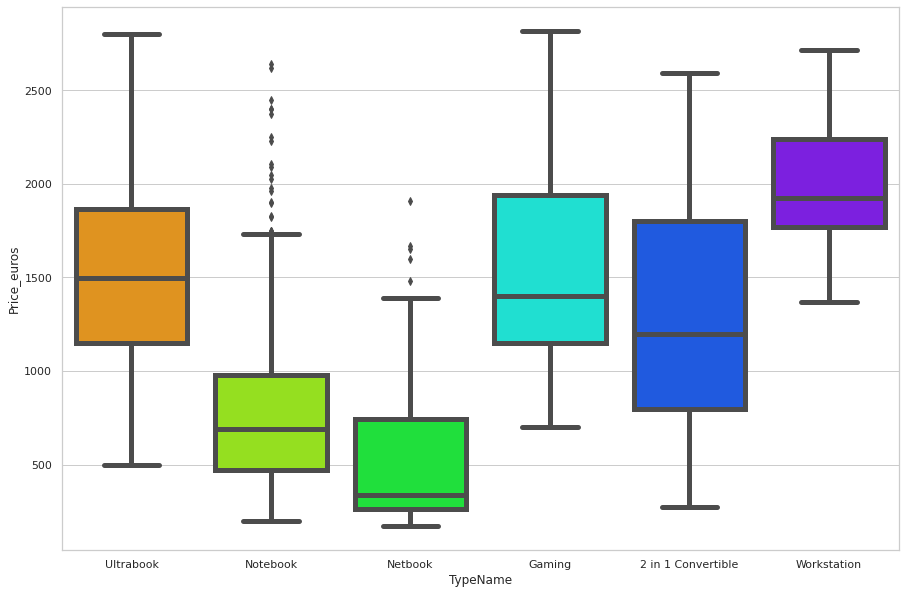

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x='TypeName',y='Price_euros',data = data,palette='gist_rainbow',linewidth=5)

Process of Data Cleaning:

In [ ]:

def sufrem(clmn):
    clmn = clmn.str.replace(r'TB', '')
    clmn = clmn.str.replace(r'GB', '').fillna(0)
    return clmn
def TBhandle(clmn):
    if clmn < 6 :
        return clmn*1024
    else :
        return clmn

In [ ]:
def clean(df):
    df['Ram'] = df['Ram'].replace('[GB]', '', regex=True)   
    df['Ram'] = pd.to_numeric(df['Ram'])
    df['Weight'] = df['Weight'].replace('[kg]', '', regex=True)
    df['Weight'] = pd.to_numeric(df['Weight'])
    df['cpu_speed(GHz)'] = pd.to_numeric(df['Cpu'].str.split(' ').str[-1].replace('[GHz]', '', regex=True))
    df['cpu_manuf'] = df['Cpu'].str.split(' ').str[0]
    df['Horizontal'] = pd.to_numeric(df['ScreenResolution'].str.split(' ').str[-1].str.split('x').str[0])
    df['Vertical'] = pd.to_numeric(df['ScreenResolution'].str.split(' ').str[-1].str.split('x').str[1])
    t_arr = []
    for i in df['ScreenResolution'] :                      
        s = i.split(' ')
        if "Touchscreen" in s:
            touch = True
        else :
            touch = False
        t_arr.append(touch)
    df['Touch'] = pd.to_numeric(t_arr)
    SSD = []
    HDD = []
    Hybrid = []
    Flash = []
    for i in df['Memory']:                                
        dual_s = i.split(' ')
        if "SSD" in dual_s :
            SSD_val = dual_s[dual_s.index('SSD')-1]
            SSD.append(SSD_val)
        else :
            SSD.append('0')
        if "HDD" in dual_s :
            HDD_val = dual_s[dual_s.index("HDD")-1]
            HDD.append(HDD_val)
        else :
            HDD.append('0')
        if "Flash" in dual_s :
            Flash_val = dual_s[dual_s.index("Flash")-1]
            Flash.append(Flash_val)
        else :
            Flash.append('0')
        if "Hybrid" in dual_s :
            Hybrid_val = dual_s[dual_s.index("Hybrid")-1]
            Hybrid.append(Hybrid_val)
        else :
            Hybrid.append('0')
    df['Flash'] = Flash
    df['HDD'] = HDD
    df['SSD'] = SSD
    df['Hybrid'] = Hybrid
    df[['HDD','SSD','Flash','Hybrid']] = df[['HDD','SSD','Flash','Hybrid']].apply(sufrem)
    df['HDD'] = pd.to_numeric(df['HDD']).apply(TBhandle)
    df['SSD'] = pd.to_numeric(df['SSD']).apply(TBhandle)
    df['Flash'] = pd.to_numeric(df['Flash']).apply(TBhandle)
    df['Hybrid'] = pd.to_numeric(df['Hybrid']).apply(TBhandle)
    cpu_dummies = pd.get_dummies(df['cpu_manuf'], prefix = 'cpu')
    opsys_dummies = pd.get_dummies(df['OpSys'], prefix = 'op')
    type_dummies = pd.get_dummies(df['TypeName'], prefix = 'Type')
    df = pd.concat([cpu_dummies, type_dummies , opsys_dummies, df], axis=1)
    df.drop('cpu_manuf',axis = 1, inplace = True)
    df.drop('OpSys',axis = 1, inplace = True)
    df.drop('TypeName',axis = 1, inplace = True)
    df.drop(columns=['Memory','Company','Product','ScreenResolution','Cpu'], inplace = True)
    return df

df = clean(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

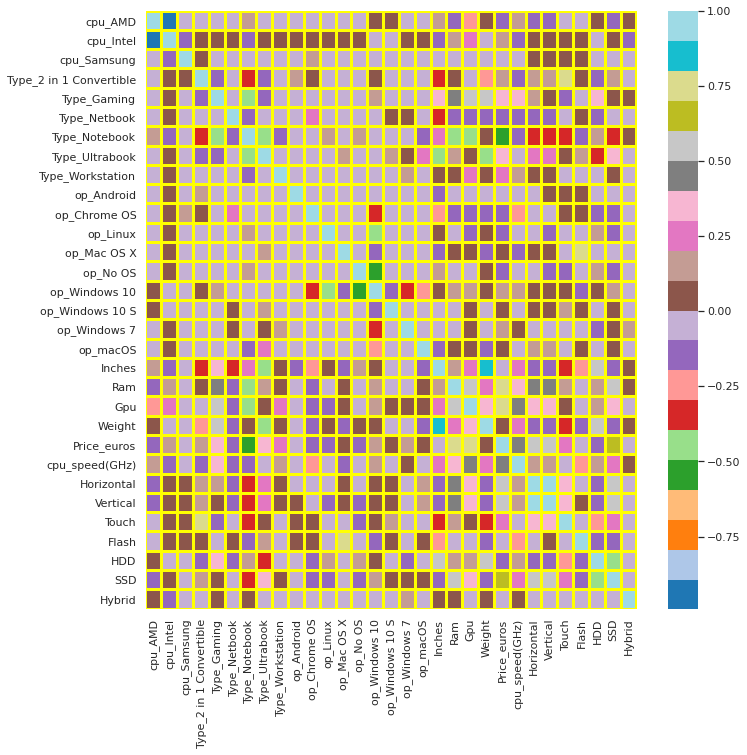

In [ ]:
corrmat = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,cmap = "tab20",linewidths = 2,linecolor = "yellow")

Target Encoding :

In [ ]:
encoder=ce.TargetEncoder(cols='Gpu')
gpu_encoded = encoder.fit_transform(df['Gpu'],df['Price_euros'])
df['Gpu'] = gpu_encoded['Gpu']

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
temp1 = df['Gpu']
temp2 = data['Gpu']
gpudf = pd.DataFrame()
gpudf['Gpu']  = temp2
gpudf['val']  = temp1

In [ ]:
df.head()

,cpu_AMD,cpu_Intel,cpu_Samsung,Type_2 in 1 Convertible,Type_Gaming,Type_Netbook,Type_Notebook,Type_Ultrabook,Type_Workstation,op_Android,op_Chrome OS,op_Linux,op_Mac OS X,op_No OS,op_Windows 10,op_Windows 10 S,op_Windows 7,op_macOS,Inches,Ram,Gpu,Weight,Price_euros,cpu_speed(GHz),Horizontal,Vertical,Touch,Flash,HDD,SSD,Hybrid
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13.3,8,1763.379069,1.37,1339.69,2.3,2560,1600,False,0,0.0,128,0.0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13.3,8,1023.580202,1.34,898.94,1.8,1440,900,False,128,0.0,0,0.0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,15.6,8,1135.158321,1.86,575.00,2.5,1920,1080,False,0,0.0,256,0.0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,15.4,16,1070.108846,1.83,2537.45,2.7,2880,1800,False,0,0.0,512,0.0
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13.3,8,1692.744971,1.37,1803.60,3.1,2560,1600,False,0,0.0,256,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 1 to 1320
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cpu_AMD                  1274 non-null   uint8  
 1   cpu_Intel                1274 non-null   uint8  
 2   cpu_Samsung              1274 non-null   uint8  
 3   Type_2 in 1 Convertible  1274 non-null   uint8  
 4   Type_Gaming              1274 non-null   uint8  
 5   Type_Netbook             1274 non-null   uint8  
 6   Type_Notebook            1274 non-null   uint8  
 7   Type_Ultrabook           1274 non-null   uint8  
 8   Type_Workstation         1274 non-null   uint8  
 9   op_Android               1274 non-null   uint8  
 10  op_Chrome OS             1274 non-null   uint8  
 11  op_Linux                 1274 non-null   uint8  
 12  op_Mac OS X              1274 non-null   uint8  
 13  op_No OS                 1274 non-null   uint8  
 14  op_Windows 10           

Building a Model :

In [ ]:
y = (df['Price_euros'])
X = np.array(df.drop(['Price_euros'],1))

In [ ]:
X_train , X_test , y_train , y_test = model_selection.train_test_split(X , y , test_size = 0.2, random_state = 22)

Cleaning Data To Be Predicted :

In [ ]:
pred_df = pd.DataFrame({'Company':['HP'],'Product':['250 G6'],'TypeName' : ['Notebook'],'Inches' : [14],'ScreenResolution' : ['IPS Panel Full HD 1920x1080'], 'Cpu' : ['Intel Core i7 7500U 2.7GHz'],'Ram' : ['8GB'],'Memory' : ['1TB SSD'],'Gpu' : ['Intel HD Graphics 620'], 'OpSys' : ['Linux'], 'Weight' : ['1.5kg']})
pred_df = clean(pred_df)

In [ ]:
l = ['cpu_AMD','cpu_Intel','cpu_Samsung','Type_2 in 1 Convertible','Type_Gaming','Type_Netbook','Type_Notebook','Type_Ultrabook','Type_Workstation','op_Android','op_Chrome', 'op_Linux',
       'op_Mac OS X', 'op_No OS', 'op_Windows 10', 'op_Windows 10 S',
       'op_Windows 7', 'op_macOS']
for col in l:
    pred_df[col] = 0

In [ ]:
a = pred_df['Gpu'][0]
pred_df['Gpu'] = gpudf.loc[gpudf.Gpu==a,'val'].values[0]

Linear Regression :

In [ ]:
clf = LinearRegression ()
clf.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
clf.score(X_train,y_train)

0.7963799723663094

In [ ]:
clf.score(X_test,y_test)

0.7888777682574388

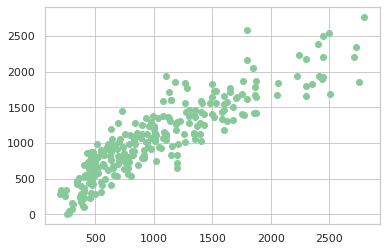

In [ ]:
y_predicted = clf.predict(X_test)
plt.scatter(y_test,y_predicted,color = '#88c999')

Ridge:

In [ ]:
ridlr = Ridge()
ridlr.fit(X_train, y_train)
score = ridlr.score(X_test,y_test)
score

0.7892888500291874

Random Forest Regressor :

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfr.score(X_train,y_train)  #train score

0.976429910826258

In [ ]:
rfr.score(X_test,y_test)   #test score

0.8493155728100502

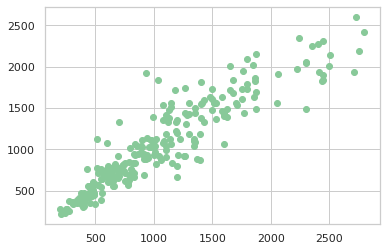

In [ ]:
y_predicted = rfr.predict(X_test)
plt.scatter(y_test,y_predicted, color = '#88c999')

From the above, Random forest Regressor has the best Scores. So the required value to be predicted : 

In [ ]:
price = rfr.predict(pred_df)[0]
price

308.4726000000001